# Slučajne promenljive i njihove raspodele

Slučajna promenljiva opisuje brojnom vrednošću skup svih elementarnih događaja iz određenog skupa $\Omega$. Slučajna promenljiva može da bude diskretna ili kontinualna. Npr. događaji kod bacanja novčića ili kockice mogu se predstaviti pomoću diskretne slučajne promenljive. Događaji koji se odnose npr. na neke merene fizičke veličine kao što su temperatura, pritisak, ili npr. srednja ocena studenata, se mogu opisati samo pomoću kontinualnih slučajnih promenljvih. Razlog predstavljanja događaja pomoću slučajnih promenljivih je pojednostavljenje raznih analitičkih i statističkih analiza.

U biblioteci scipy.stats su funkcije pomocu kojih se jednostavno manipulise sa standardnim raspodelama. 

# Diskretne raspodele
## Binomna raspodela

Crtanje zakona raspodele (engl. $probability$ $mass$ $function$ - PMF) $B_{p,n}$ - binomne slučajne promenljive sa parametrima $p$ i $n$. Sa interaktivnim slajderom menjamo $n$ i $p$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import ipywidgets as widgets


def plot_pmf(n, p):
    '''
    Plotuje zakon binomne raspodele (binomial PMF) Binom(n, p)
    '''
    k = np.arange(0, n+1)
    P_binom = stats.binom.pmf(k, n, p)
    plt.plot(k, P_binom, '-o')
    axes = plt.gca()
    axes.set_xlim([0, n])
    axes.set_ylim([0, 1.1 * max(P_binom)])
    plt.title('Zakon raspodele Bin(%i, %.2f)' % (n, p))
    plt.xlabel('Broj uspeha - k')
    plt.ylabel('Verovatnoca za k uspeha')
    plt.show()

widgets.interact(
    plot_pmf,
    n=widgets.IntSlider(min=0, max=100, step=1, value=15),
    p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))


A Jupyter Widget

<function __main__.plot_pmf>

## Poasonova raspodela

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import ipywidgets as widgets


def f(n, λ):
    k = np.arange(0, n+1)
    P_poisson = poisson.pmf(k, λ)
    plt.plot(k, P_poisson, '-o')
    plt.title('Poasonova raspodela za lambda=%i' %λ)
    plt.xlabel('Broj dogadjaja')
    plt.ylabel('Verovatnoca broja dogadjaja')
    plt.show()
widgets.interact(f, n=widgets.IntSlider(min=0, max=50, step=1, value=25), λ=widgets.FloatSlider(min=0, max=30, step=0.1, value=5))

A Jupyter Widget

<function __main__.f>

## Geometrijska raspodela

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom
import ipywidgets as widgets



def f(p, n_max):
    x = np.arange(1, n_max + 1)
    
    # "rucno" odredjivanje raspodela verovatnoca
    y = [((1 - p)**(z - 1)) * p for z in x]
    z = [(1 - (1 - p)**zz) for zz in x]
    
    #moze i pomocu
    # geom.pmf(x, p)
    #y=geom.pmf(x, p)
    #z=geom.cdf(x, p)
    
    plt.plot(x, y, 'o-', label='PDF')
    plt.plot(x, z, 'ro-', label='CDF')
    
    plt.gcf().set_size_inches(20, 10)
    
    plt.xlabel('n', fontsize=20)
    plt.title('Zakon raspodele i kumulativna raspodela geometrijske slucajnce promenljive sa p=%0.2f' % p, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=18)
    plt.show()


widgets.interact(
    f,
    p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5),
    n_max=widgets.IntSlider(min=2, max=1000, step=1, value=10))

A Jupyter Widget

<function __main__.f>

# Kontinualne (neprekidne) raspodele

## Uniformna raspodela

Grafički prikaz funkcije gustine raspodele (engl. probability density function - PDF) za unifornu raspodelu $U[a,b]$ na intervalu $[a,b]$. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import uniform



def f(s):
    
    a = s[0]
    b = s[1]
    
    x = np.linspace(a,b,20)
    
    
    if b != a:
        #pdf rucno
        #y = np.array([1/(b-a)]*20)
    
        # pomocu uniform.pdf(x,loc=a,scale=b-a)
        y=uniform.pdf(x,loc=a,scale=b-a)
        
        x_cdf = np.linspace(0, 10, 1001)

        cdf = []
        #rucno
        #cdf.extend([0 for z in x_cdf if z<=a])
        #cdf.extend([(z-a)/(b-a) for z in x_cdf if z>a and z<=b])
        #cdf.extend([1 for z in x_cdf if z>b])
        # pomocu uniform.cdf(x_cdf, loc=a,scale=b-a)
        cdf=uniform.cdf(x_cdf, loc=a,scale=b-a)
    
        plt.plot(x, y, linewidth = 3.0, label = 'PDF')
        plt.gcf().set_size_inches(8, 4)
        plt.gca().set_xlim([0, 10])
        plt.gca().set_ylim([0, 2])
 
        plt.plot([a, a], [0, 1/(b-a)], 'g--', linewidth = 2.0)
        plt.plot([b, b], [0, 1/(b-a)], 'g--', linewidth = 2.0)
        plt.title('Funkcija gustine raspodele U(%0.2f,%0.2f)' %(a,b))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot(x_cdf, cdf, 'r', linewidth = 3.0, label = 'CDF')
        plt.legend(fontsize = 20)
        plt.show()
        
widgets.interact(f, s = widgets.FloatRangeSlider(
    description = "[a, b]",
    value=[4, 6],
    min=0,
    max=10,
    step=0.01,
    continuous_update = False))

A Jupyter Widget

<function __main__.f>

Sledeci kod ilustruje da je vrednost kumulativne raspodele u bilo kojoj tacki $x_0$ povrsina ispod funckije gustine raspodele u intervalu  $[-\infty, x_0]$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def f(x):
    x_ukupno = np.linspace(-0.5, 1.5, 201)
    
    x_raspodele = np.linspace(0, 1, 101)
    cdf = []
    cdf.extend([0 for z in x_ukupno if z<0])
    cdf.extend([z for z in x_ukupno if z>=0 and z<=1])
    cdf.extend([1 for z in x_ukupno if z>1])
    
    y = np.array([1]*101)
    
    plt.subplot(2, 1, 1)
    plt.plot(x_raspodele, y, 'b', linewidth = 3.0, label = 'Gustina raspodele')
 
    plt.gca().set_xlim([-0.5, 1.5])
    plt.gca().set_ylim([0, 1.01])
 
    plt.plot([0, 0], [0, 1], 'g--', linewidth = 2.0)
    plt.plot([1, 1], [0, 1], 'g--', linewidth = 2.0)
    plt.xlabel('x')
    plt.ylabel('y')
   
    plt.gca().fill_between(x_raspodele, y, where = x_raspodele<=x, facecolor='cyan')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    plt.subplot(2, 1, 2)

    plt.gca().set_xlim([-0.5, 1.5])
    plt.gca().set_ylim([0, 1.01])

    plt.plot([0, 0], [0, 1], 'g--', linewidth = 2.0)
    plt.plot([1, 1], [0, 1], 'g--', linewidth = 2.0)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_ukupno, cdf, 'r', linewidth = 3.0, label = 'Kumulativna raspodela')
    plt.plot(x, x, 'bo')
    
    plt.plot([-1, x], [x, x], 'm--', linewidth=2.0)
    plt.plot([x, x], [0, x], 'm--', linewidth=2.0)
   
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    plt.show()
   # plt.plot(n, sum(abs(y0 - y))/n, 'o')
   # plt.show()
    
widgets.interact(f, x = widgets.FloatSlider(description = "$x$", min = 0, max = 1, value = 0.5, step = 0.01, continuous_update = False))

A Jupyter Widget

<function __main__.f>

# Eksponencijalna raspodela

Sledeci kod plotuje funkciju gustine eksponencijalne raspodele kao i kumulativnu raspodelu sa parametrom $\lambda$ (koji moze da se menja pomocu interaktivnog slajdera)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import expon

def f(lam, x_max, y_max):
    x = np.arange(0, x_max, x_max/1000)
    # rucno
    #y = lam*np.exp(-lam*x)
    #z = 1 - np.exp(-lam*x)
    
    #pomocu expon.pdf(x, scale=1/lam)
    y=expon.pdf(x, scale=1/lam)
    z=expon.cdf(x, scale=1/lam)
    
    plt.plot(x, y, linewidth = 3.0, label = 'Gustina raspodele')
    plt.plot(x, z, 'r', linewidth = 3.0, label = 'Kumulativna raspodela')
    
    plt.title("Eksponencijalna raspodela (%.2f)" %lam, fontsize = 20)
    plt.gcf().set_size_inches(20,10)
    plt.xlabel('x', fontsize = 20)
    plt.ylabel('y', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.gca().set_xlim([0,x_max])
    plt.gca().set_ylim([0,y_max])
    plt.legend(fontsize = 18)
    plt.show()
widgets.interact(f, lam=widgets.FloatSlider(description = '$\lambda$', 
                                            min=0.01, max=10, step=0.01, value=0.5), 
                 x_max=widgets.FloatSlider(description = '$x_{\max}$', 
                                           min=1, max=1000, step=1, value=10), 
                 y_max=widgets.FloatSlider(description = '$y_{\max}$', min=0.1, max=10, step=0.1, value=1))

A Jupyter Widget

<function __main__.f>

### Aproksimacija geometrijske raspodele eksponencijalnom
Za malo $p$, eksponencijalna raspodela sa $\lambda=p$ je dobra aproksimacija geometrijske sa parametrom $p$. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom
import ipywidgets as widgets


def aprox(n, p):

    x = np.arange(1, n+1)
    y = [((1-p)**(z-1))*p for z in x]
    lam = p
    x0 = np.arange(1, n+1, 1.0*n/1000)
    y0 = lam*np.exp(-lam*x0)
    plt.plot(x0, y0, label = 'Eksponencijalna(%0.2f)' %lam)
    plt.plot(x, y, 'r', label = 'Geometrijska(%0.2f)' %p)
    plt.legend(fontsize = 20)
    plt.gcf().set_size_inches(20,10)
    axes = plt.gca().set_xlim([1,n])
    
    plt.xlabel('x', fontsize = 20)
    plt.ylabel('y', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.show()
    
    x0 = np.arange(1, n+1)
    y0 = lam*np.exp(-lam*x0)
    print("")
    print('|| P_E - P_G ||\u2081 = ',sum(abs(y-y0)))
    
widgets.interact(aprox, p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5), n=widgets.IntSlider(min=2, max=1000, step=1, value=10))

A Jupyter Widget

<function __main__.aprox>

## Normalna (Gausova) raspodela

Nacrtacemo normalnu raspodelu $N(\mu,\sigma^2)$, u zavisnoti od srednje vrednosti i varijanse

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from scipy.stats import norm

e = np.e
pi = np.pi

def crtaj(m, var, x_range, y_max):

    x_min = x_range[0]
    x_max = x_range[1]
    x = np.linspace(-100, 100, 10001)
    sig = var**0.5
    P_norm = norm.pdf(x, m, sig)
    fig = plt.gcf()
    fig.set_size_inches(16,8)
    plt.plot(x, P_norm, 'b', linewidth=3.0, label = "Gustina raspodele")
    CDF_norm = norm.cdf(x, m, sig)
    plt.plot(x, CDF_norm, 'r', linewidth=3.0, label = "Kumulativna raspodela")
    
    y0 = (1/(sig*np.sqrt(2*pi)))*np.exp(-0.5)
    ym = 1/(sig*np.sqrt(2*pi))
    
    plt.plot([m-sig, m-sig], [0, y0], 'm--', linewidth = 2.0, label = '$\mu\pm\sigma$')
    plt.plot([m+sig, m+sig], [0, y0], 'm--', linewidth = 2.0)
    plt.plot([m,m], [0,ym], 'g--', linewidth = 2.0, label = r'$\mu$')
    plt.legend(fontsize = 20)
    axes = plt.gca()
    axes.set_xlim([x_min, x_max])
    axes.set_ylim([0,y_max])
    plt.title('N(%0.2f, %0.2f)' %(m,var), fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.xlabel('x', fontsize = 20)
    plt.ylabel('y', fontsize = 20)
    plt.show()
    
#a = np.linspace(0, 5, 1001)
#rng = e**a
widgets.interact(crtaj, m=widgets.FloatSlider(description = '$m$', min=-50, max=50, step=0.1, value=0, continuous_update = False), 
                 var=widgets.FloatSlider(description = '$\sigma^2$', min=0.5, max=30, step=0.1, value=1, continuous_update = False), 
                 x_range = widgets.IntRangeSlider(description = "$[x_{min},  x_{max}]$",
    value=[-25, 25], min=-100,  max=100, step=1, continuous_update = False), 
  y_max=widgets.FloatSlider(description = '$y_{max}$', min=0.1, max=1, step=0.1, value=0.5, continuous_update = False))
         

A Jupyter Widget

<function __main__.crtaj>

Za kontinualne raspodele:
Verovatnoce u intervalima mogu da se racunaju kombinujuci kumulativne (.cdf) i/ili survival funkcije (.sf).

# Aproksimacija empirijske gustine raspodele (histograma) neprekidnom raspodelom

Da bismo tacno odredili neprekidnu gustinu raspodele potrebno nam je beskonacno mnogo tacaka. Zbog toga se pribegava aproksimaciji raspodele odredjenom familijom raspodela. Cesto se za familuje uzimaju mesavine parametrizovanih Gausovih funkcija (Gaussian mixture). 

Koristicemo podatke o temperaturama u gradu Detroitu, pokusacemo da raspodelu modeliramo Gausovom mesavinom.


### Plotovanje histograma temepratura u Detroitu (sa npr 100 bin-ova)

In [10]:
import pandas as pd

plt.style.use('seaborn-talk')
atributi = ['Detroit']
df = pd.read_csv("temperature.csv",usecols=atributi)
df.head()

Detroit
0         NaN
1  284.030000
2  284.069789
3  284.173965
4  284.278140

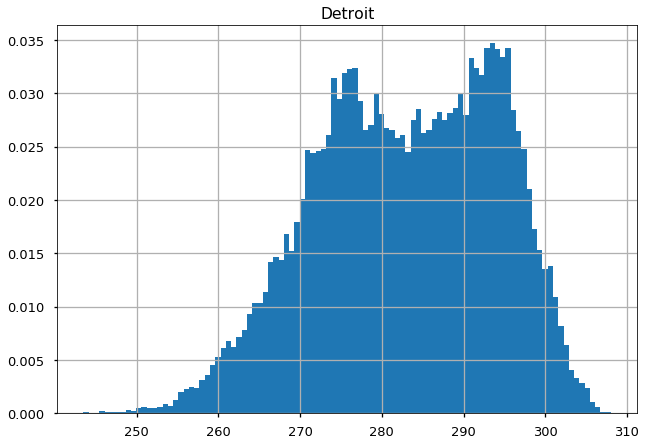

In [11]:
hist = df.hist(density=True,bins=100)
plt.show()

#### Odokativna aproksimacija
Probacemo aproksimaciju Gausovom raspodelom, i Gausovom mesavinom sa adekvatnim srednjim vr. i varijansama
1. Norm(m=283K, sigma=11K), 
2. $0.5\cdot$ Norm(m=276K, sigma=6K)+$0.5\cdot$Norm(m=293K, sigma=6.5K), 
3. $0.5\cdot$ Norm(m=276K, sigma=6.5K)+$0.5\cdot$Norm(m=293K, sigma=6K)

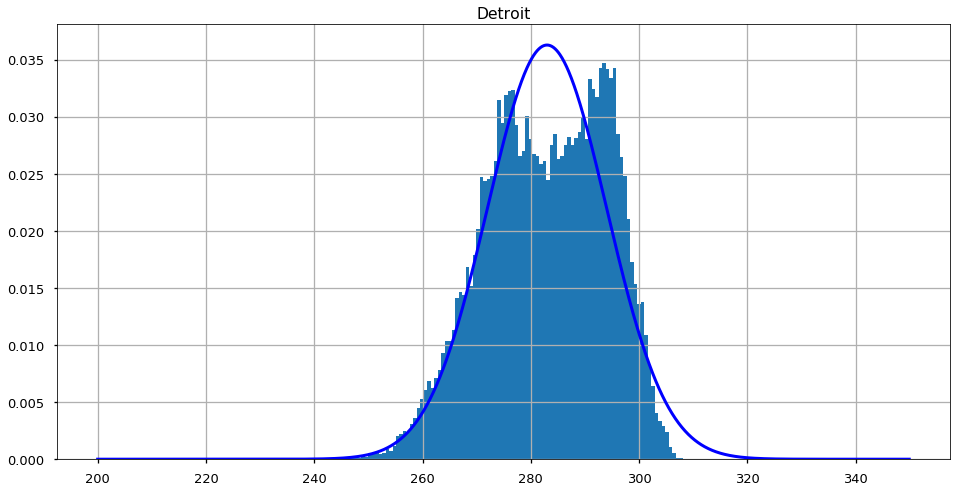

In [12]:
from scipy.stats import norm

hist = df.hist(density=True,bins=100)

korak=0.1
x = np.arange(200, 350, korak)
m=283
sig=11
P_norm = norm.pdf(x, m, sig)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.plot(x, P_norm, 'b', linewidth=3.0)
plt.show()

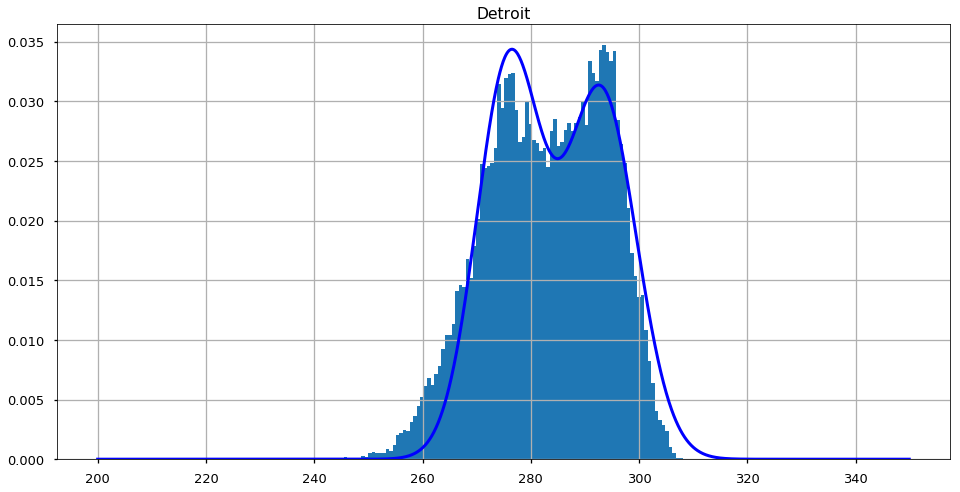

In [13]:
hist = df.hist(density=True,bins=100)
x = np.arange(200, 350, korak)
m1=276
sig1=6
m2=293
sig2=6.5

P_norm_mix1 = 0.5*norm.pdf(x, m1, sig1)+0.5*norm.pdf(x, m2, sig2)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.plot(x, P_norm_mix1, 'b', linewidth=3.0)
plt.show()

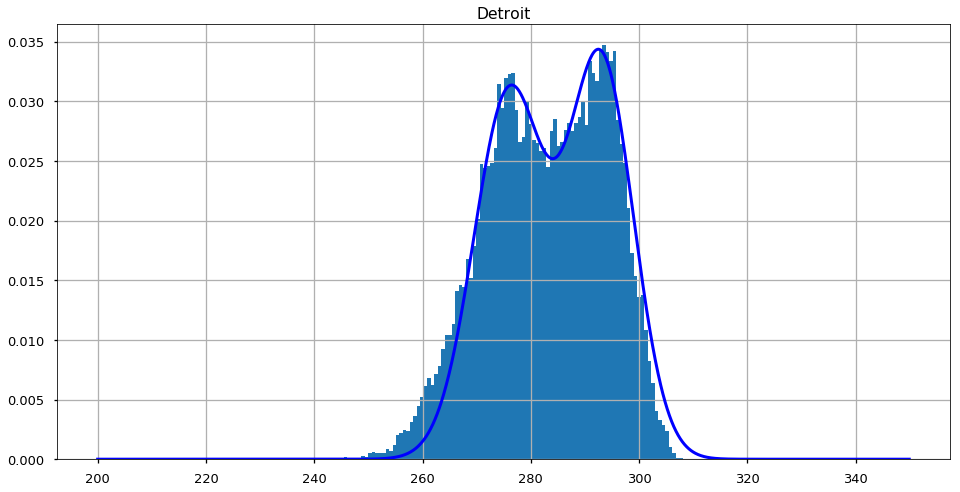

In [14]:
hist = df.hist(density=True,bins=100)
x = np.arange(200, 350, korak)
m1=276
sig1=6.5
m2=293
sig2=6

P_norm_mix2 = np.array(0.5*norm.pdf(x, m1, sig1)+0.5*norm.pdf(x, m2, sig2))
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.plot(x, P_norm_mix2, 'b', linewidth=3.0)
plt.show()

Na osnovu gornje aproksimacije odredicemo verovatnocu da je temperatura izmedju 275 i 290:

In [1]:
# Rucno priblizno integraljenje:

PP=np.array([korak*z for x,z in zip(x,P_norm_mix2) if (x>275 and x<290)])
P_trazeno=PP.sum()
print(P_trazeno)

NameError: name 'np' is not defined

## Vežbanje

Odrediti histograme temperatura u drugim gradovima i grafički odrediti približne aproksimacije funkcije gustine raspodele Gausovim mešavinama.